<a href="https://colab.research.google.com/github/nitin578/103_Country_Covid19_Vaccinations/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

In [34]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

#Canada Vaccination Data

In [4]:
Canada_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/Canada.csv')

In [7]:
Canada_df.head()

,date,total_vaccinations,people_fully_vaccinated,total_boosters,people_vaccinated,location,source_url,vaccine
0,2020-12-14,5,0,0,5,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
1,2020-12-15,727,0,0,727,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2,2020-12-16,3015,0,0,3015,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
3,2020-12-17,7266,0,0,7266,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4,2020-12-18,11274,0,0,11274,Canada,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


In [9]:
Canada_df.columns

Index(['date', 'total_vaccinations', 'people_fully_vaccinated',
       'total_boosters', 'people_vaccinated', 'location', 'source_url',
       'vaccine'],
      dtype='object')

#>>>CANADA DATASET CLEANING >>>

**Removed the source_url column from the dataframe as it just stores the same links to destination**

In [10]:
# removing unwanted columns
columns_to_remove = ['source_url']
Canada_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Removed the Total Boosters column from the dataframe as it has no data with zero value.**

In [11]:
columns_to_remove = ['total_boosters']
Canada_df.drop(labels=columns_to_remove, axis=1, inplace=True)

**Checking the removed column**

In [12]:
Canada_df.columns

Index(['date', 'total_vaccinations', 'people_fully_vaccinated',
       'people_vaccinated', 'location', 'vaccine'],
      dtype='object')

**Creating a BoxPlot for Total_Vaccinations**

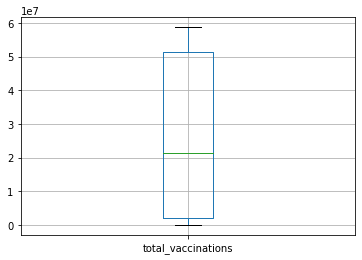

In [13]:
Canada_df.boxplot(column=['total_vaccinations'])

In [14]:
# check the unique values in vaccine column
Canada_df.vaccine.unique()

array(['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'], dtype=object)

In [18]:
# Numerical values
numerical_features = [feature for feature in Canada_df.columns if Canada_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [20]:
Canada_df[numerical_features].head()

,total_vaccinations,people_fully_vaccinated,people_vaccinated
0,5,0,5
1,727,0,727
2,3015,0,3015
3,7266,0,7266
4,11274,0,11274


58,663,274
58663274


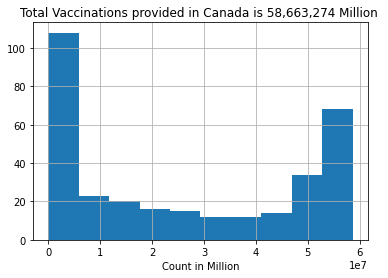

In [24]:
Canada_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count in Million")
plt.title("Total Vaccinations provided in Canada is 58,663,274 Million ")
column = Canada_df["total_vaccinations"]
max_value = column.max()
number_with_commas = "{:,}".format(58663274 )
print(number_with_commas)
print(max_value)

29,845,343
29845343


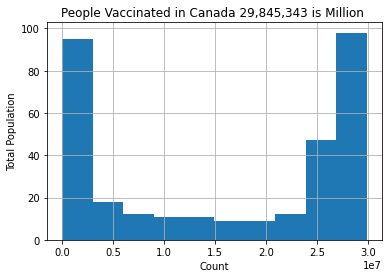

In [27]:
Canada_df[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Vaccinated in Canada 29,845,343 is Million ")
column = Canada_df["people_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(29845343)
print(number_with_commas)
print(max_value)

28,272,392
28272392


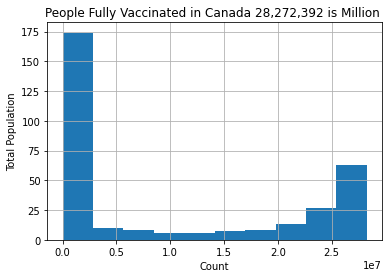

In [32]:
Canada_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Fully Vaccinated in Canada 28,272,392 is Million ")
column = Canada_df["people_fully_vaccinated"]
max_value = column.max()
number_with_commas = "{:,}".format(28272392)
print(number_with_commas)
print(max_value)

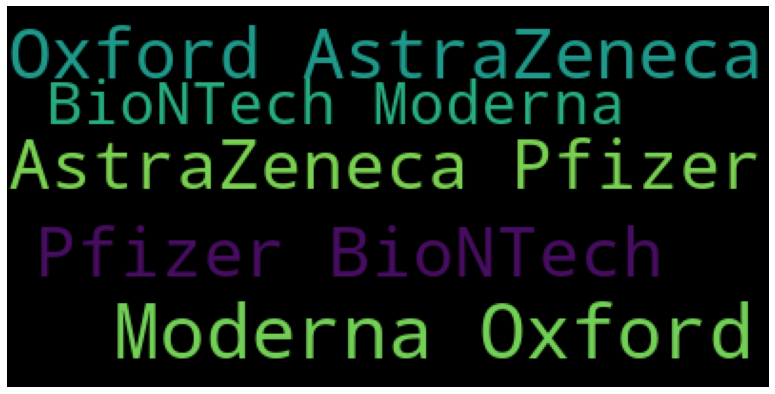

In [35]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 40).generate(' '.join(Canada_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

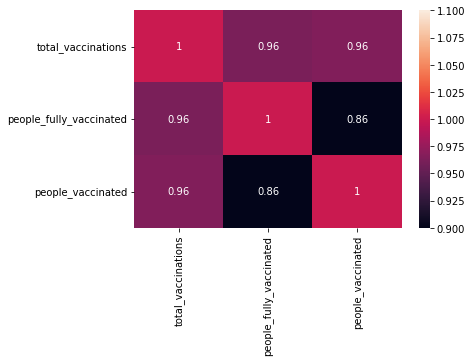

In [36]:
sns.heatmap(Canada_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)